**TASK 1 : BIG DATA JOB FAMILIES IDENTIFICATION**

In [2]:
import pandas as pd
df=pd.read_csv('/content/data dice.com.csv')

In [ ]:
df.info()

In [ ]:
df.Role.nunique() # 4570 got unique job roles

In [ ]:
df.Role.value_counts() # role wise count of the jobs

Role
Data Engineer                                663
Big Data Engineer                            249
Data Scientist                               194
Senior Data Engineer                         163
Senior   Software Engineer                    84
                                            ... 
Maintenance Engineer                           1
AVP    Data Engineer                           1
Lead Project Manager    Federal                1
IT Security Governance Analyst I               1
Full Stack Production Support IT Engineer      1
Name: count, Length: 4568, dtype: int64

In [3]:
df['Role']=df['Role'].str.replace('[\'\,\_\/\-\(\)\|\||]','')

<ipython-input-3-5d42270ca448>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Role']=df['Role'].str.replace('[\'\,\_\/\-\(\)\|\||]','')


In [5]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming your DataFrame is named 'df' and the column containing the text is named 'text_column'

# Load the NLTK English stopwords
stop_words = set(stopwords.words('english')+['Sr.','Senior','Lead'])

# Define a function to remove stop words from a given text
def remove_stop_words(text):
    tokens = word_tokenize(text)  # Tokenize the text into individual words
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Filter out stop words
    return ' '.join(filtered_tokens)  # Join the filtered tokens back into a string

# Apply the remove_stop_words function to the text_column and store the results in a new column
df['Role'] = df['Role'].apply(remove_stop_words)

# Display the resulting DataFrame with stop words removed
print(df['Role'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                                Big Data Engineer
1                                    Data Engineer
2                                Big Data Engineer
3                                Big Data Engineer
4                        Big Data Hadoop Developer
                           ...                    
11206      Urgent Hire Data Architect 100 % Remote
11207                     Big Data Cloud architect
11208                   Hadoop Java SQL Consultant
11209                                    Java Tech
11210    Full Stack Production Support IT Engineer
Name: Role, Length: 11211, dtype: object


In [6]:
import pandas as pd
from nltk import ngrams
from collections import Counter

# Assuming your DataFrame is named 'df' and the job title column is named 'job_title'

# Concatenate all job titles into a single string
all_titles = ' '.join(df['Role'].values)

# Tokenize the job titles into individual words
tokens = all_titles.split()

# Generate all possible bigrams from the tokens
bigrams =  ngrams(tokens,2)
trigrams = ngrams(tokens,3)

# Count the occurrences of each bigram
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Sort the bigrams by their frequency count in descending order
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)
sorted_trigrams = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)

# Display the sorted list of bigrams and their counts

In [7]:
for bigram, count in sorted_bigrams:
    if count > 100 :
        print('Bigram:', bigram, 'Count:', count)


Bigram: ('Data', 'Engineer') Count: 1921
Bigram: ('Engineer', 'Data') Count: 906
Bigram: ('Big', 'Data') Count: 822
Bigram: ('Software', 'Engineer') Count: 802
Bigram: ('Data', 'Scientist') Count: 583
Bigram: ('Engineer', 'Big') Count: 458
Bigram: ('Data', 'Architect') Count: 322
Bigram: ('Data', 'Analyst') Count: 260
Bigram: ('Machine', 'Learning') Count: 179
Bigram: ('Systems', 'Engineer') Count: 175
Bigram: ('Business', 'Analyst') Count: 174
Bigram: ('Engineer', 'Software') Count: 163
Bigram: ('Scientist', 'Data') Count: 149
Bigram: ('Product', 'Manager') Count: 143
Bigram: ('Engineer', 'III') Count: 140
Bigram: ('Developer', 'Data') Count: 138
Bigram: ('Analyst', 'Data') Count: 138
Bigram: ('SAP', 'Data') Count: 131
Bigram: ('Manager', 'SAP') Count: 128
Bigram: ('Network', 'Engineer') Count: 127
Bigram: ('Data', 'Developer') Count: 124
Bigram: ('Full', 'Stack') Count: 124
Bigram: ('Developer', 'Consultant') Count: 122
Bigram: ('Architect', 'Data') Count: 119
Bigram: ('Data', 'Scien

In [8]:
for trigram, count in sorted_trigrams:
    if count > 50 :
        print('Trigram:', trigram, 'Count:', count)

Trigram: ('Data', 'Engineer', 'Data') Count: 691
Trigram: ('Engineer', 'Data', 'Engineer') Count: 589
Trigram: ('Engineer', 'Big', 'Data') Count: 450
Trigram: ('Big', 'Data', 'Engineer') Count: 420
Trigram: ('Data', 'Engineer', 'Big') Count: 403
Trigram: ('Data', 'Scientist', 'Data') Count: 141
Trigram: ('Engineer', 'Software', 'Engineer') Count: 128
Trigram: ('Manager', 'SAP', 'Data') Count: 126
Trigram: ('Big', 'Data', 'Developer') Count: 116
Trigram: ('Engineer', 'Data', 'Scientist') Count: 102
Trigram: ('Staff', 'Software', 'Engineer') Count: 100
Trigram: ('Machine', 'Learning', 'Engineer') Count: 93
Trigram: ('Software', 'Engineer', 'III') Count: 83
Trigram: ('Data', 'Analyst', 'Data') Count: 77
Trigram: ('Developer', 'Data', 'Engineer') Count: 74
Trigram: ('Google', 'Cloud', 'Platform') Count: 73
Trigram: ('Engineer', 'Machine', 'Learning') Count: 68
Trigram: ('Scientist', 'Data', 'Scientist') Count: 66
Trigram: ('Data', 'Architect', 'Manager') Count: 66
Trigram: ('Principal', 'S

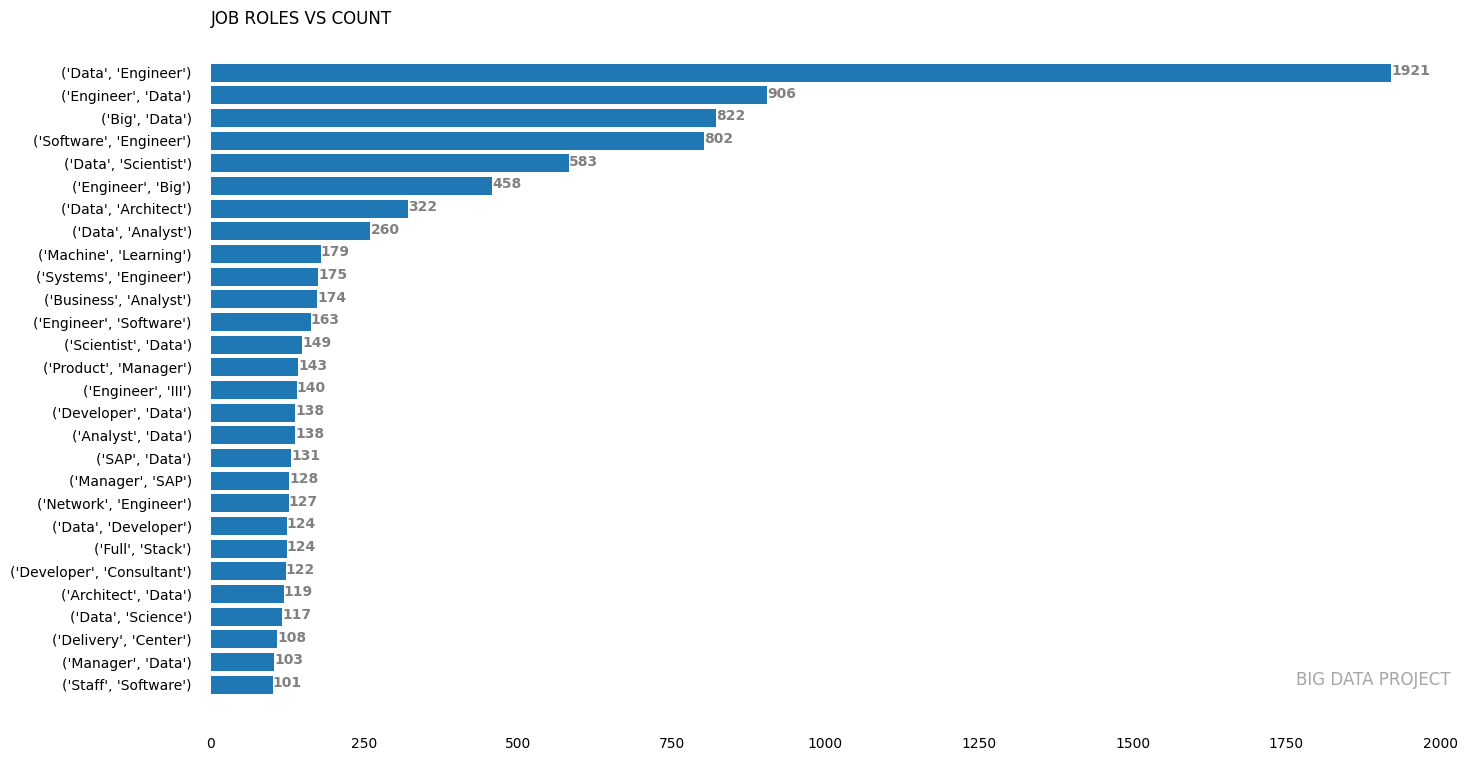

In [9]:
import matplotlib.pyplot as plt

jobs=[]
counts=[]

for bigram, count in sorted_bigrams:
    if count>100 and bigram not in jobs:
        #print('Bigram:', bigram, 'Count:', count)
        jobs.append(str(bigram))
        counts.append(count)

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(jobs, counts)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
#ax.grid(b = True, color ='grey',
#       linestyle ='-.', linewidth = 0.5,
#       alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

#Add Plot Title
ax.set_title('JOB ROLES VS COUNT',
             loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'BIG DATA PROJECT', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

# Show Plot
plt.show()

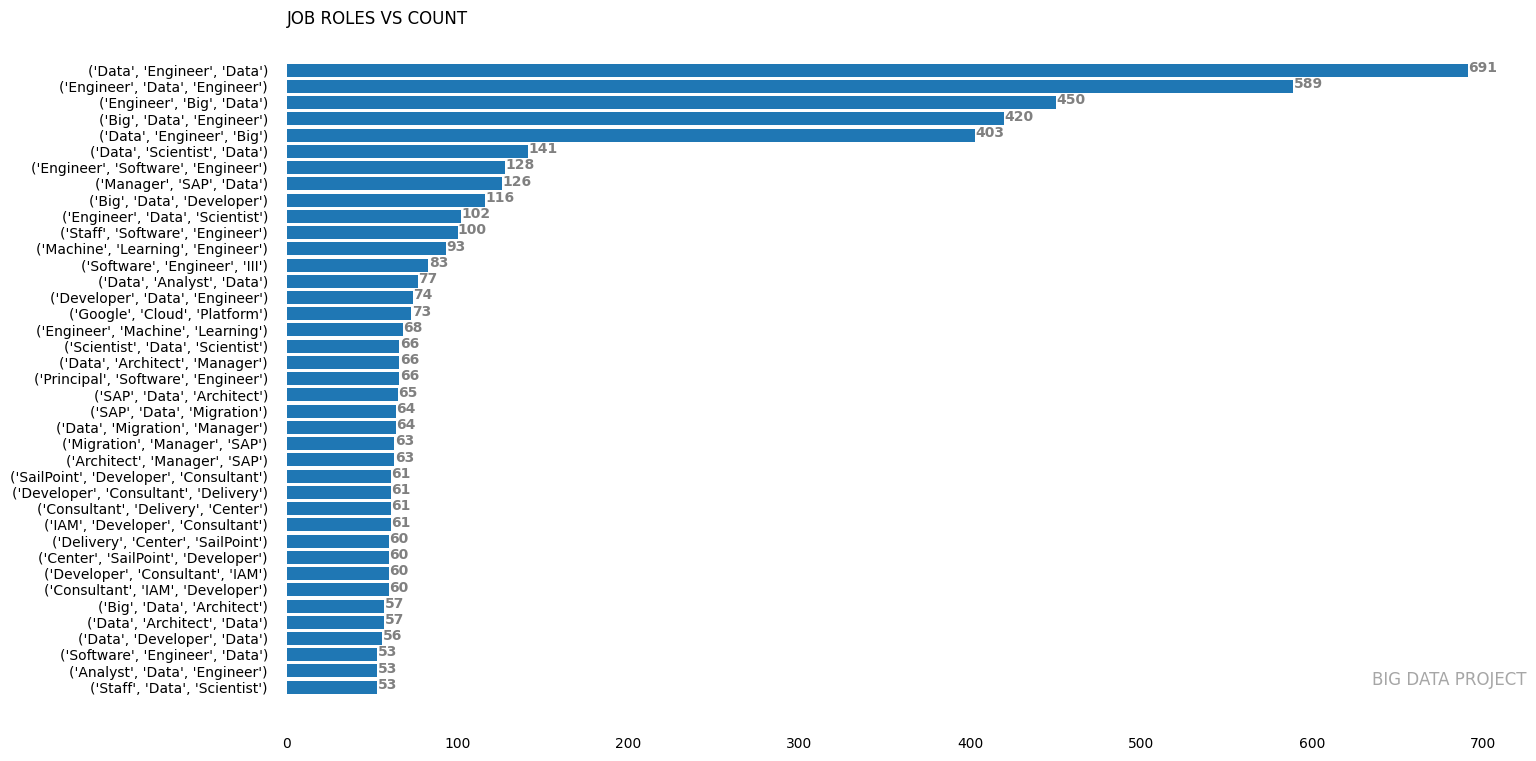

In [10]:
import matplotlib.pyplot as plt

jobs=[]
counts=[]

for trigram, count in sorted_trigrams:
    if count>50 and trigram not in jobs:
        #print('Bigram:', bigram, 'Count:', count)
        jobs.append(str(trigram))
        counts.append(count)

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(jobs, counts)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
#ax.grid(b = True, color ='grey',
#       linestyle ='-.', linewidth = 0.5,
#       alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

#Add Plot Title
ax.set_title('JOB ROLES VS COUNT',
             loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'BIG DATA PROJECT', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

# Show Plot
plt.show()

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

# Load the dataset
data = pd.read_csv('/content/data dice.com.csv')  # Replace 'your_dataset.csv' with the actual file path

# Extract relevant features (Job_Role)
job_roles = data['Role']

# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(job_roles)

# Apply K-means clustering with k=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Get the most common job name to name the cluster
for cluster in range(k):
    cluster_jobs = data[data['Cluster'] == cluster]
    job_count = len(cluster_jobs)

    # Get the most common job name
    common_job_name = Counter(cluster_jobs['Role']).most_common(1)[0][0]

    # Print cluster information
    print(f'Cluster {cluster} (Common Job Name: {common_job_name}):')
    print(f'Job Count: {job_count}')
    print('-' * 30)


Cluster 0 (Common Job Name: Data Engineer):
Job Count: 1827
------------------------------
Cluster 1 (Common Job Name: Data Scientist):
Job Count: 527
------------------------------
Cluster 2 (Common Job Name: Senior   Software Engineer):
Job Count: 894
------------------------------
Cluster 3 (Common Job Name: SAP Data Architect Manager):
Job Count: 7963
------------------------------


**TASK 2 : IDENTIFICATION OF THE SKILL SETS (HOMOGENEOUS)**

In [ ]:
!pip install bertopic

In [17]:
df = pd.read_csv('/content/bigdata_skills.csv')

In [18]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# we add this to remove stopwords, for lower volumes of data stopwords can cause issues
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

# deal with df if needed
if type(df['Skills']) is list:
    text = df['Skills']
else:
    text = df['Skills'].tolist()

# initialize the model
model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,min_topic_size=20,
    verbose=True
)
topics, probs = model.fit_transform(text)

Batches:   0%|          | 0/138 [00:00<?, ?it/s]

2023-11-08 18:49:42,538 - BERTopic - Transformed documents to Embeddings
2023-11-08 18:49:54,801 - BERTopic - Reduced dimensionality
2023-11-08 18:49:55,397 - BERTopic - Clustered reduced embeddings


In [19]:
for i in range(10):
    print(f"{topics[i]}: {df['Skills'][i]}")

0: SCALA, Big Data, Spark, hive, restful, java, Hadoop, Restful Web Api Development
0: Java, Hadoop, Big Data, Hive, Big Data processing, cluster management, NoSQL databases, Hadoop ecosystem framework
0: Data Engineering, Data modeling, Big Data, Data structures, SQL, Project development, Hive, Sqoop
0: spark, Cloudera, Hadoop, hive, scala, airflow, big data, cloudera hadoop
0: Big Data, Pyspark, Hive, Data Engineering, Hadoop, Kafka, Azure Databricks, Spark
0: big data, python, java, performance tuning, scala, agile, Spark, sdlc
0: Big Data, Design patterns, Hadoop, Kafka, Spring, Looker, design pattern, SQL
0: SCALA, Spark, AWS, Azure Data Factory, Hive, Hadoop, Big Data, Leadership
0: Pyspark, Spark, Python, Hive, Map Reduce, Hadoop, Cloud, BigData
0: Big Data, ETL Tools, Shell Scripting, Hadoop, SQL coding, HBase, Hive, Linux


In [20]:
freq = model.get_topic_info()
freq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1138,-1_data_management_agile_analytics,"[data, management, agile, analytics, sql, lear...","[SAN, Data migration, Data management, data se..."
1,0,959,0_spark_hadoop_data_scala,"[spark, hadoop, data, scala, big, hive, big da...","[Hive, Shell Scripting, Scala, Hadoop, Big Dat..."
2,1,410,1_data_learning_machine_analysis,"[data, learning, machine, analysis, machine le...","[Data analysis, Data management, Analytical, M..."
3,2,377,2_azure_azure data_factory_data factory,"[azure, azure data, factory, data factory, mic...","[Azure, Azure Data Factory, Azure Synapse, Pys..."
4,3,224,3_linux_unix_shell_shell scripting,"[linux, unix, shell, shell scripting, scriptin...","[Unix, Linux, RDBMS, Analytical, Shell scripti..."
5,4,208,4_nosql_cassandra_mongodb_nosql data,"[nosql, cassandra, mongodb, nosql data, data, ...","[C++, metadata, NoSQL, cassandra, GCP, Project..."
6,5,149,5_python_learning_machine_machine learning,"[python, learning, machine, machine learning, ...","[python, Data science, Big Data, data scientis..."
7,6,134,6_agile_scrum_management_business,"[agile, scrum, management, business, agile dat...","[RDBMS, Coding, data security, Agile, Scrum, D..."
8,7,105,7_bi_power_power bi_tableau,"[bi, power, power bi, tableau, etl, data, bi d...","[Staffing, power bi, SSIS, SQL, Python, data, ..."
9,8,93,8_supply chain_chain_supply_business,"[supply chain, chain, supply, business, manage...","[Supply chain, Automation, Business transforma..."


In [21]:
model.visualize_topics()

**TASK 3 : COMPETENCY OF SKILLS BY JOB FAMILY**

In [22]:
model.visualize_barchart()